In [1]:
%matplotlib inline


# Nearest Neighbors regression


Demonstrate the resolution of a regression problem
using a k-Nearest Neighbor and the interpolation of the
target using both barycenter and constant weights.

Hubness reduction of this low-dimensional dataset
shows only small effects.

Adapted from https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

Automatically created module for IPython interactive environment


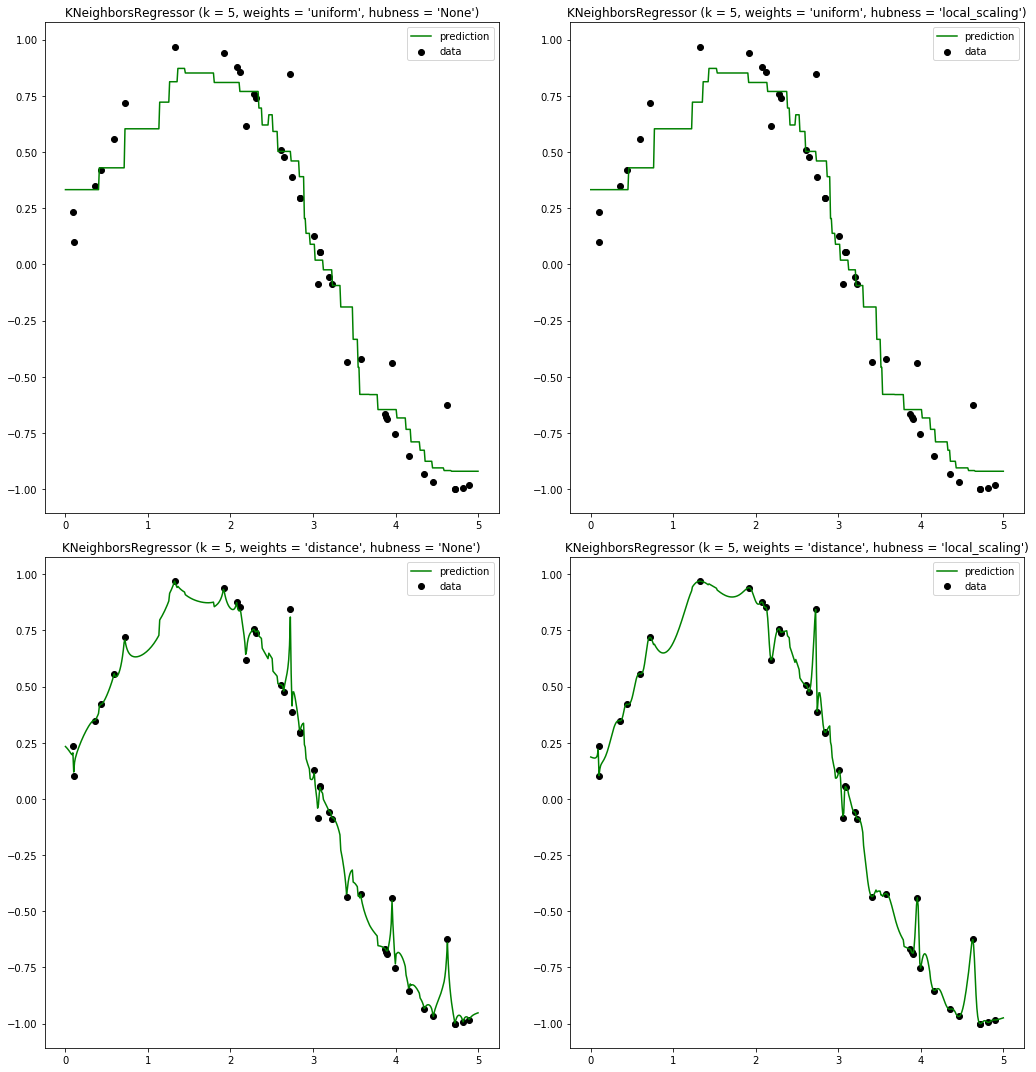

In [2]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA


# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from hubness import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

f = plt.figure()
for i, weights in enumerate(['uniform', 'distance']):
    for j, hubness in enumerate([None, 'local_scaling']):
        knn = neighbors.KNeighborsRegressor(n_neighbors,
                                            algorithm_params={'n_candidates': 39},
                                            weights=weights,
                                            hubness=hubness)
        y_ = knn.fit(X, y).predict(T)

        plt.subplot(2, 2, i * 2 + j + 1)
        f.set_figheight(15)
        f.set_figwidth(15)
        plt.scatter(X, y, c='k', label='data')
        plt.plot(T, y_, c='g', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title(f"KNeighborsRegressor (k = {n_neighbors}, weights = '{weights}', hubness = '{hubness}')")

plt.tight_layout()
plt.show()